In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib 
import numpy as np
import optuna.integration.lightgbm as lgb
import lightgbm as lgb2
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

%matplotlib inline

In [2]:
!ls

Untitled.ipynb
gbm.txt
recommend_site
生活者総合調査2019.csv
生活者総合調査2019_itemlist.txt
生活者総合調査2019調査概要.pdf
生活者総合調査2019調査項目.xlsx


In [3]:
data = pd.read_csv('生活者総合調査2019.csv', encoding = "shift-jis")

/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (46,72,77,91,92,93,95,169,170,171,172,173,174,175,176,179,180,181,182,183,184,185,186,189,190,234,235,236,237,238,239,243,244,245,246,247,248,250,251,252,253,254,274,275,276,277,334,348,349,459,785,853,889,950,975,1423,1425,1428,1429,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439,1440,1443,1444,1445,1448,1449,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459,1460,1461,1462,1463,1464,1465,1467,1469,1470,1471,1472,1473,1474,1475,1476,1477,1478,1479,1480,1481,1482,1484,1485,1486,1487,1488,1489,1491,1492,1494,1495,1496,1497,1498,1499,1500,1501,1502,1503,1504,1505,1506,1507,1508,1509,1510,1511,1512,1513,1514,1515,1516,1518,1519,1520,1521,1522,1523,1524,1525,1526,1528,1529,1530,1531,1532,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542,1543,1544,1545,1546,1547,1548,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558,1559,1560,1561,1562,1563,1564,1565,1566,1567,1568,1569,1570,1571,1572,1573,1

In [4]:
data

,KEY,SKEY,DUMMY00,AAF1,AAF2,AAF3,AAF3_1,AAF4,AAF5,AAAA,...,CL2,CL3,CL4,CL5,CL6,CL7,CL8,CL9,CL10,CL11
0,100000001,197100000129,NaN,2,46,13,1,1,1,12,...,8.0,NaN,7.0,4.0,3.0,NaN,5.0,7.0,NaN,NaN
1,100000002,197100000024,NaN,1,43,13,1,2,3,1,...,NaN,6.0,NaN,6.0,6.0,1.0,NaN,NaN,2.0,NaN
2,100000003,197100000185,NaN,1,33,27,2,1,"1,2,3",1,...,NaN,1.0,NaN,1.0,1.0,1.0,NaN,NaN,1.0,NaN
3,100000004,197100000135,NaN,1,28,27,2,2,"1,3",14,...,NaN,3.0,NaN,3.0,3.0,1.0,NaN,NaN,2.0,1.0
4,100000005,197100000096,NaN,1,40,13,1,1,"1,2",5,...,NaN,2.0,NaN,7.0,7.0,6.0,NaN,NaN,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13851,100015008,197100015201,NaN,2,63,28,2,1,2,12,...,NaN,NaN,NaN,NaN,NaN,NaN,8.0,5.0,NaN,NaN
13852,100015009,197100021895,NaN,2,34,29,2,1,2,1,...,7.0,NaN,3.0,5.0,3.0,NaN,4.0,6.0,NaN,NaN
13853,100015010,197100018965,NaN,1,38,12,1,3,NaN,1,...,NaN,2.0,NaN,5.0,3.0,2.0,NaN,NaN,3.0,NaN
13854,100015011,197100002878,NaN,1,25,26,2,1,"1,2,3",11,...,NaN,4.0,NaN,5.0,2.0,2.0,NaN,NaN,3.0,6.0


In [5]:
def visualize_data(df, label_tuple, column, width=18):
    items = [len(df[df[column]==float(i[0])]) for i in label_tuple]
    items_name = [i[1] for i in label_tuple]

    plt.figure(figsize=(width, 4))
    plt.bar(items_name, items, 0.35)

In [6]:
tihou_tuple = (
(1, '関東'),
    (2, '関西'), 
    (3, '不明')
)

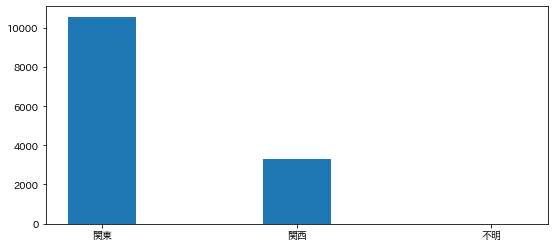

In [7]:
visualize_data(data, tihou_tuple, 'AAF3_1', 9)

In [8]:
data_kantou = data[data['AAF3_1']==1]

In [9]:
data_kantou

,KEY,SKEY,DUMMY00,AAF1,AAF2,AAF3,AAF3_1,AAF4,AAF5,AAAA,...,CL2,CL3,CL4,CL5,CL6,CL7,CL8,CL9,CL10,CL11
0,100000001,197100000129,NaN,2,46,13,1,1,1,12,...,8.0,NaN,7.0,4.0,3.0,NaN,5.0,7.0,NaN,NaN
1,100000002,197100000024,NaN,1,43,13,1,2,3,1,...,NaN,6.0,NaN,6.0,6.0,1.0,NaN,NaN,2.0,NaN
4,100000005,197100000096,NaN,1,40,13,1,1,"1,2",5,...,NaN,2.0,NaN,7.0,7.0,6.0,NaN,NaN,7.0,NaN
6,100000007,197100000110,NaN,1,43,12,1,2,1,1,...,NaN,3.0,NaN,1.0,6.0,6.0,NaN,NaN,6.0,NaN
7,100000008,197100000048,NaN,2,38,13,1,1,1,1,...,3.0,NaN,2.0,1.0,3.0,NaN,1.0,2.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13847,100015004,197100007166,NaN,2,47,13,1,2,"1,2,3",1,...,6.0,NaN,3.0,6.0,4.0,NaN,5.0,6.0,NaN,NaN
13848,100015005,197100020230,NaN,1,49,13,1,4,NaN,3,...,NaN,2.0,NaN,3.0,5.0,2.0,NaN,NaN,4.0,NaN
13850,100015007,197100015299,NaN,1,39,12,1,1,2,4,...,NaN,3.0,NaN,5.0,4.0,7.0,NaN,NaN,7.0,NaN
13853,100015010,197100018965,NaN,1,38,12,1,3,NaN,1,...,NaN,2.0,NaN,5.0,3.0,2.0,NaN,NaN,3.0,NaN


In [10]:
area_tuple = ((1, '千代田区'),
(2, '中央区'),
(3, '港区'),
(4, '新宿区'),
(5, '文京区'),
(6, '台東区'),
(7, '墨田区'),
(8, '江東区'),
(9, '品川区'),
(10, '目黒区'),
(11, '大田区'),
(12, '世田谷区'),
(13, '渋谷区'),
(14, '中野区'),
(15, '杉並区'),
(16, '豊島区'),
(17, '北区'),
(18, '荒川区'),
(19, '板橋区'),
(20, '練馬区'),
(21, '足立区'),
(22, '葛飾区'),
(23, '江戸川区'),
(24, 'その他の東京'),
(25, '横浜市'),
(26, '川崎市'),
(27, 'その他の神奈川'),
(28, '千葉市'),
(29, 'その他の千葉'),
(30, 'さいたま市'),
(31, 'その他の埼玉'),
(32, '水戸市'),
(33, 'その他の茨城'),
(34, '宇都宮市'),
(35, 'その他の栃木'),
(36, '前橋市'),
(37, '高崎市'),
(38, 'その他の群馬'),
(39, '不明'))

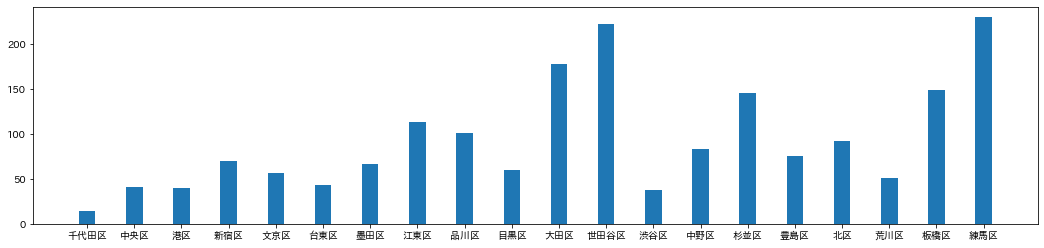

In [11]:
visualize_data(data_kantou, area_tuple[:20], 'IAAA_E')

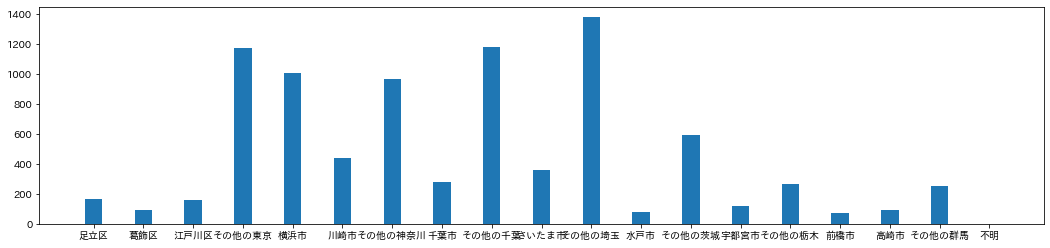

In [12]:
visualize_data(data_kantou, area_tuple[20:], 'IAAA_E')

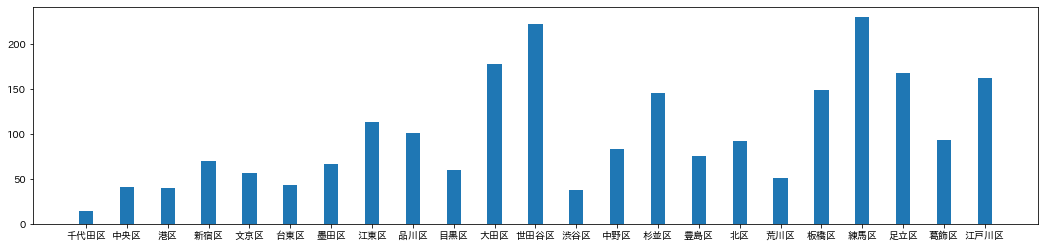

In [13]:
visualize_data(data_kantou, area_tuple[:23], 'IAAA_E')

In [14]:
data_23 = data_kantou[data_kantou['IAAA_E'] < 24]

In [15]:
data_23

,KEY,SKEY,DUMMY00,AAF1,AAF2,AAF3,AAF3_1,AAF4,AAF5,AAAA,...,CL2,CL3,CL4,CL5,CL6,CL7,CL8,CL9,CL10,CL11
1,100000002,197100000024,NaN,1,43,13,1,2,3,1,...,NaN,6.0,NaN,6.0,6.0,1.0,NaN,NaN,2.0,NaN
7,100000008,197100000048,NaN,2,38,13,1,1,1,1,...,3.0,NaN,2.0,1.0,3.0,NaN,1.0,2.0,NaN,NaN
20,100000021,197100000092,NaN,1,43,13,1,2,2,7,...,NaN,6.0,NaN,7.0,3.0,4.0,NaN,NaN,5.0,NaN
24,100000025,197100000120,NaN,1,40,13,1,1,3,1,...,NaN,5.0,NaN,4.0,4.0,2.0,NaN,NaN,2.0,NaN
26,100000027,197100000149,NaN,2,44,13,1,2,2,1,...,9.0,NaN,8.0,6.0,7.0,NaN,7.0,4.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13806,100014963,197100016327,NaN,2,25,13,1,3,NaN,12,...,4.0,NaN,4.0,1.0,1.0,NaN,3.0,2.0,NaN,2.0
13812,100014969,197100007221,NaN,2,34,13,1,1,2,12,...,6.0,NaN,3.0,5.0,3.0,NaN,6.0,5.0,NaN,NaN
13820,100014977,197100021872,NaN,2,18,13,1,1,1,11,...,3.0,NaN,2.0,3.0,NaN,NaN,2.0,2.0,NaN,2.0
13834,100014991,197100021887,NaN,2,45,13,1,2,1,7,...,2.0,NaN,3.0,3.0,3.0,NaN,2.0,4.0,NaN,NaN


In [16]:
kouhuku_tuple = (
(1, '1'),
(2, '2'),
(3, '3'),
(4, '4'),
(5, '5'),
(6, '6'),
(7, '7'),
(8, '8'),
(9, '9'),
(10, '10'),
(11, '11'),
(12, '不明'))

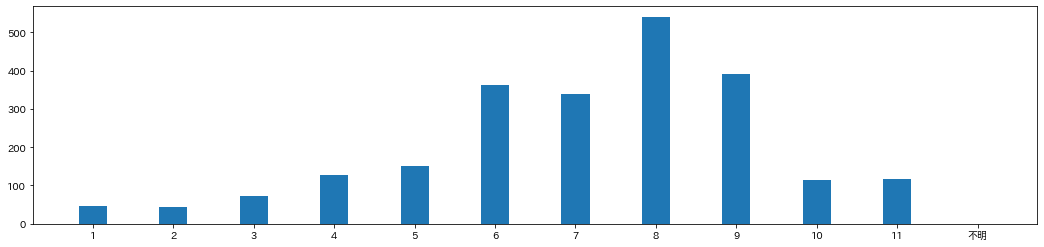

In [17]:
visualize_data(data_23, kouhuku_tuple, 'CEAL')

In [18]:
manzoku_tuple =((1, '非常にあてはまる'),
(2, 'ややあてはまる'),
(3, 'あまりあてはまらない'),
(4, '全くあてはまらない'),
(5, '不明'))

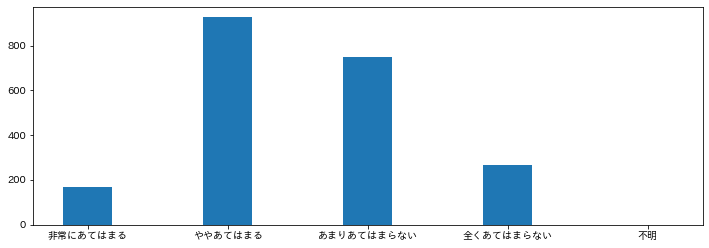

In [19]:
visualize_data(data_23, manzoku_tuple, 'CEAB_29', 12)

In [20]:
tubo_tuple = ((1, '15坪未満'),
(2, '15～20坪未満'),
(3, '20～25坪未満'),
(4, '25～30坪未満'),
(5, '30～35坪未満'),
(6, '35～40坪未満'),
(7, '40～45坪未満'),
(8, '45～50坪未満'),
(9, '50坪以上'),
(10, '分からない'),
(11, '不明'))

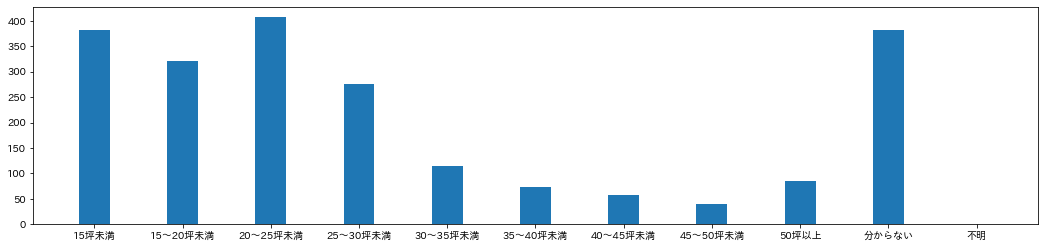

In [21]:
visualize_data(data_23, tubo_tuple, 'CKAB')

In [22]:
ie_tuple = ((1, '持家一戸建（土地も所有）'),
(2, '持家一戸建（土地は借地）'),
(3, '分譲マンション'),
(4, '借家一戸建'),
(5, '賃貸マンション・アパート'),
(6, '社宅・寮'),
(7, 'その他（間借りなど）'),
(8, '不明'))

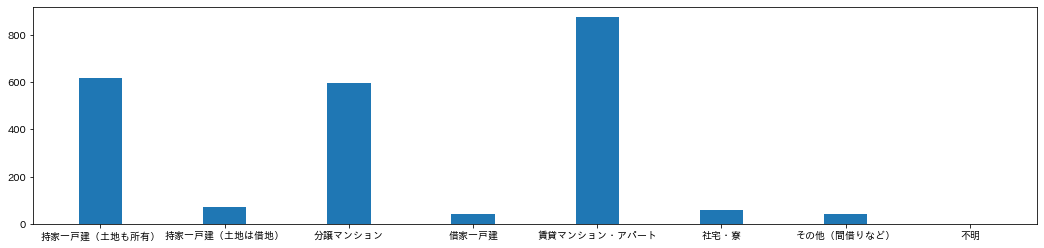

In [23]:
visualize_data(data_23, ie_tuple, 'CKAA')

In [24]:
age_tuple = tuple([(i, i) for i in range(15, 70)])

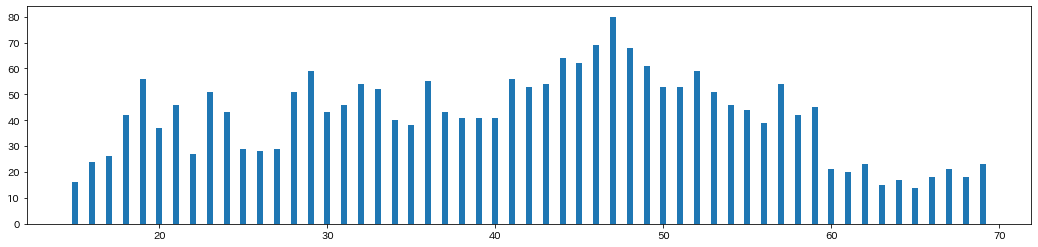

In [25]:
visualize_data(data_23, age_tuple, 'AAF2')

In [26]:
data_over = data_23[data_23['AAF2'] >= 20]

In [27]:
# AAAX, AAAY, AAAZは連続値に修正可能
# exp_variable = ['CKAA', 'CKAB', 'IAAA_E', 'IAAB_E', 'AAAA', 'AAAB', 'AAAC', 'AAAQ', 'AAAU_01', 'AAAX', 'AAAY', 'AAAZ']
exp_variable = ['CKAA', 'CKAB', 'IAAA_E', 'IAAB_E', 'AAAA', 'AAAB', 'AAAC', 'AAAX', 'AAAY', 'AAAZ']
exp_variable_serial = ['AAAR_01']
exp_variable_serial += [f'CKAF_{i}' for i in range(1, 26)]
exp_variable_serial += [f'AAAR_{i}' for i in range(1, 12)]
exp = pd.DataFrame()

data['IAAA_E'] = data['IAAA_E'].fillna(39)
data['IAAB_E'] = data['IAAB_E'].fillna(41)
data['CKAB'] = data['CKAB'].fillna(11)
data['AAAB'] = data['AAAB'].fillna(4)
data['AAAX'] = data['AAAX'].fillna(16)
data['AAAY'] = data['AAAY'].fillna(16)
data['AAAZ'] = data['AAAZ'].fillna(12)

for i in range(1, 12):
    data[f'AAAR_{i}'] = data[f'AAAR_{i}'].fillna(0)
for i in range(1, 26):
    data[f'CKAF_{i}'] = data[f'CKAF_{i}'].fillna(2.5)
for e in exp_variable:
    print(e)
    exp[e] = data[e].astype('category')
exp_variable = ['AAAQ', 'AAAU_01']
for e in exp_variable:
    exp[e] = data[e].astype('category')
for e in exp_variable_serial:
    exp[e] = data[e]

CKAA
CKAB
IAAA_E
IAAB_E
AAAA
AAAB
AAAC
AAAX
AAAY
AAAZ


In [28]:
import math
for i in data['AAAX']:
    if math.isnan(i):
        print(1)

In [31]:
ans = data['CEAL']

In [32]:
X_train, X_val, y_train, y_val = train_test_split(exp, ans, test_size=0.2, random_state=42)

In [33]:
len(y_val)

2772

In [34]:
model = lgb2.LGBMRegressor() # モデルのインスタンスの作成
model.fit(X_train, y_train) # モデルの学習

# テストデータの予測
y_pred = model.predict(X_val)

Text(0, 0.5, 'pred')

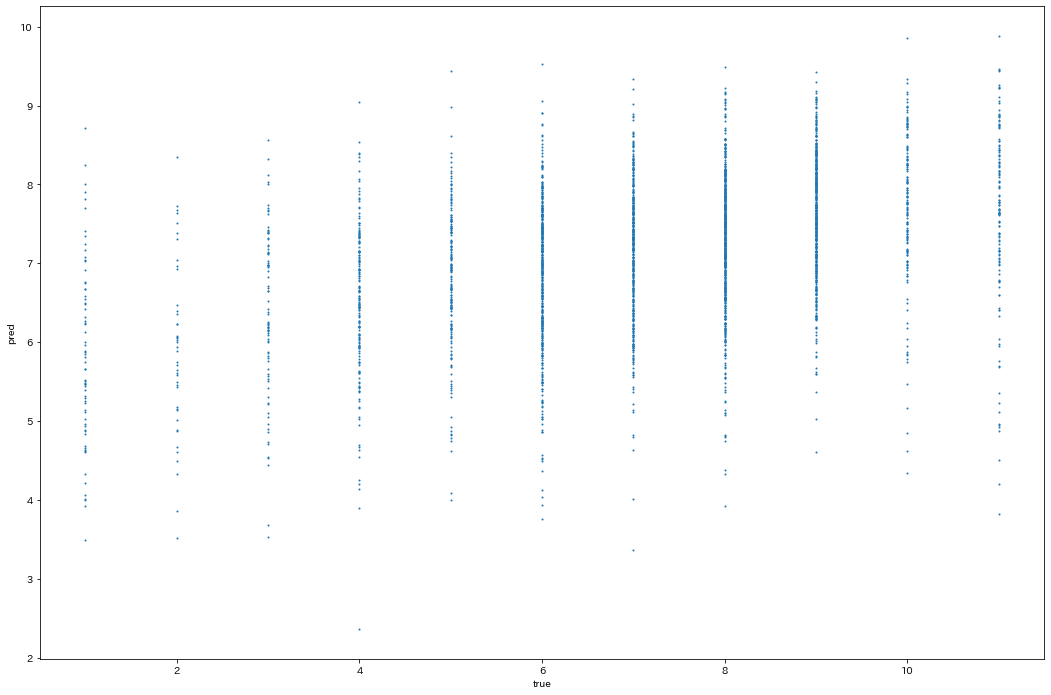

In [35]:

plt.figure(figsize=(18, 12))
plt.scatter(y_val, y_pred, s=1) 
plt.xlabel('true')
plt.ylabel('pred') 

In [36]:
y_train_p = model.predict(X_train)

Text(0, 0.5, 'pred')

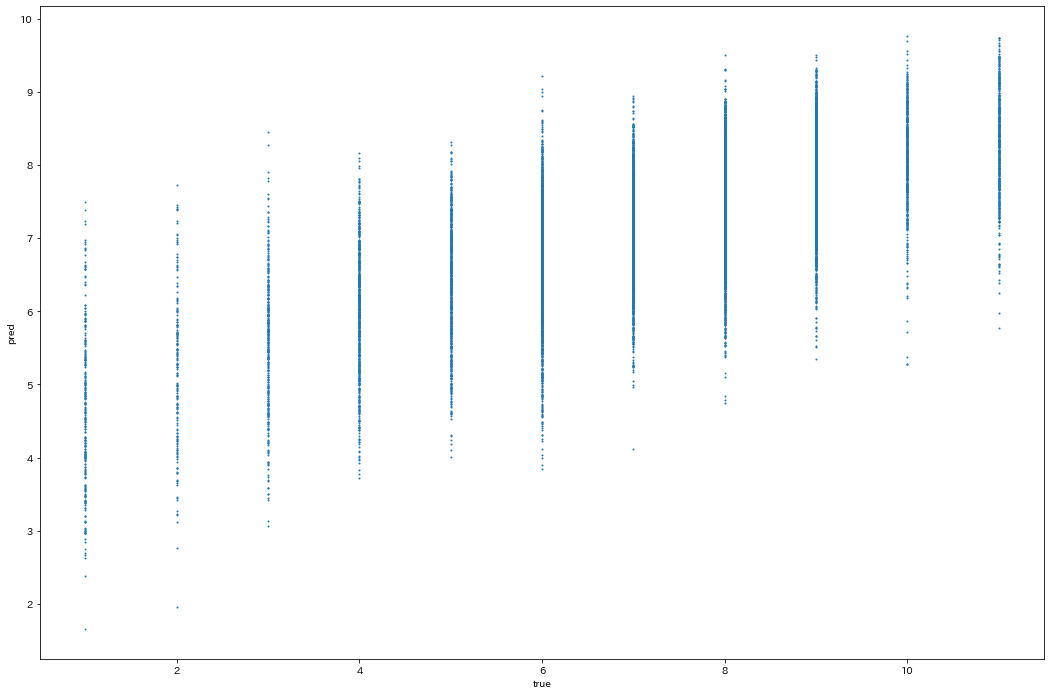

In [37]:
plt.figure(figsize=(18, 12))
plt.scatter(y_train, y_train_p, s=1) 
plt.xlabel('true')
plt.ylabel('pred') 

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

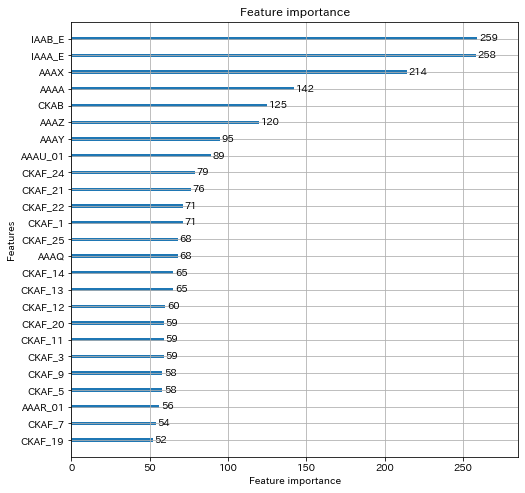

In [38]:
lgb.plot_importance(model, figsize=(8,8), max_num_features=25)

In [39]:
# モデル評価
# rmse : 平均二乗誤差の平方根
mse = mean_squared_error(y_val, y_pred) # MSE(平均二乗誤差)の算出
rmse = np.sqrt(mse) # RSME = √MSEの算出
print('RMSE :',rmse)

# r2 : 決定係数
r2 = r2_score(y_val,y_pred)
print('R2 :',r2)

RMSE : 1.9994698929794636
R2 : 0.18286264337185076


In [40]:
importance = pd.DataFrame(model.feature_importances_, index=exp.columns, columns=['importance'])
importance = importance.sort_values('importance' , ascending=False)
exp_2 = pd.DataFrame()
for e in importance[:11].index:
    exp_2[e] = exp[e]

In [41]:
exp_2

,IAAB_E,IAAA_E,AAAX,AAAA,CKAB,AAAZ,AAAY,AAAU_01,CKAF_24,CKAF_21,CKAF_22
0,40.0,24.0,4.0,12,7.0,1.0,15.0,"3,4,5",2.0,3.0,2.0
1,3.0,11.0,4.0,1,1.0,4.0,4.0,8,3.0,2.0,3.0
2,41.0,39.0,7.0,1,5.0,3.0,7.0,"2,3,4",2.0,2.0,2.0
3,41.0,39.0,15.0,14,10.0,1.0,15.0,8,3.0,2.0,2.0
4,25.0,24.0,7.0,5,2.0,2.0,6.0,8,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
13851,41.0,39.0,3.0,12,4.0,9.0,15.0,8,2.0,3.0,2.0
13852,41.0,39.0,10.0,1,3.0,6.0,4.0,"1,2,3",2.0,2.0,2.0
13853,29.0,29.0,10.0,1,3.0,5.0,7.0,"1,2,3",2.0,2.0,2.0
13854,41.0,39.0,16.0,11,1.0,12.0,16.0,8,1.0,2.0,1.0


In [42]:
X_train, X_val, y_train, y_val = train_test_split(exp_2, ans, test_size=0.2, random_state=42)

In [43]:
model = lgb2.LGBMRegressor() # モデルのインスタンスの作成
model.fit(X_train, y_train) # モデルの学習

# テストデータの予測
y_pred = model.predict(X_val)

Text(0, 0.5, 'pred')

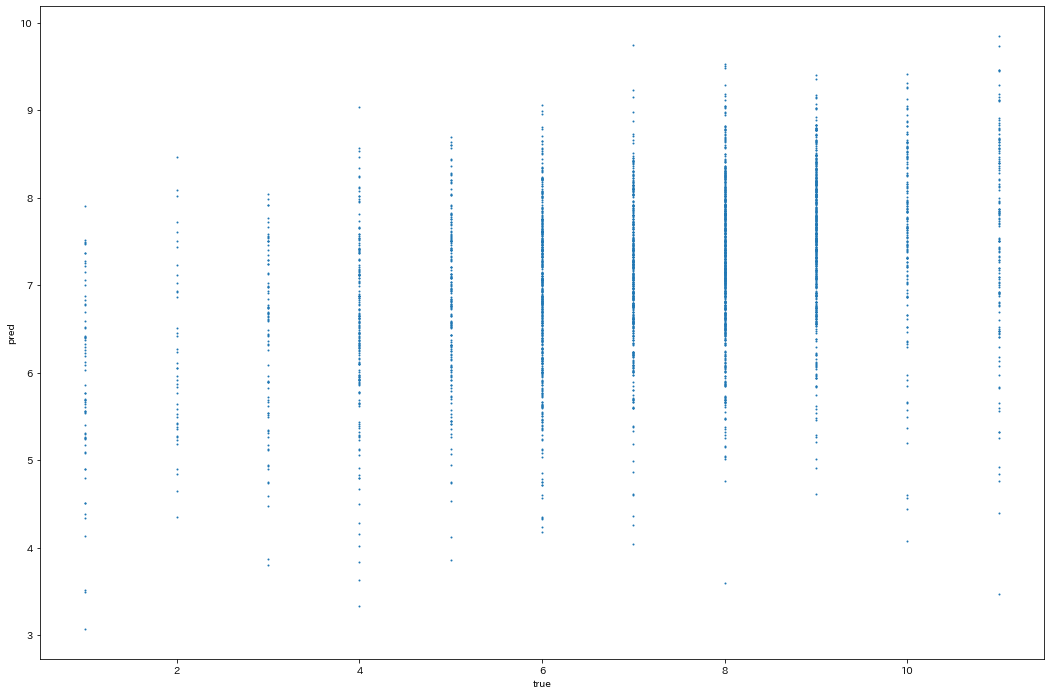

In [44]:
plt.figure(figsize=(18, 12))
plt.scatter(y_val, y_pred, s=1) 
plt.xlabel('true')
plt.ylabel('pred') 

Text(0, 0.5, 'pred')

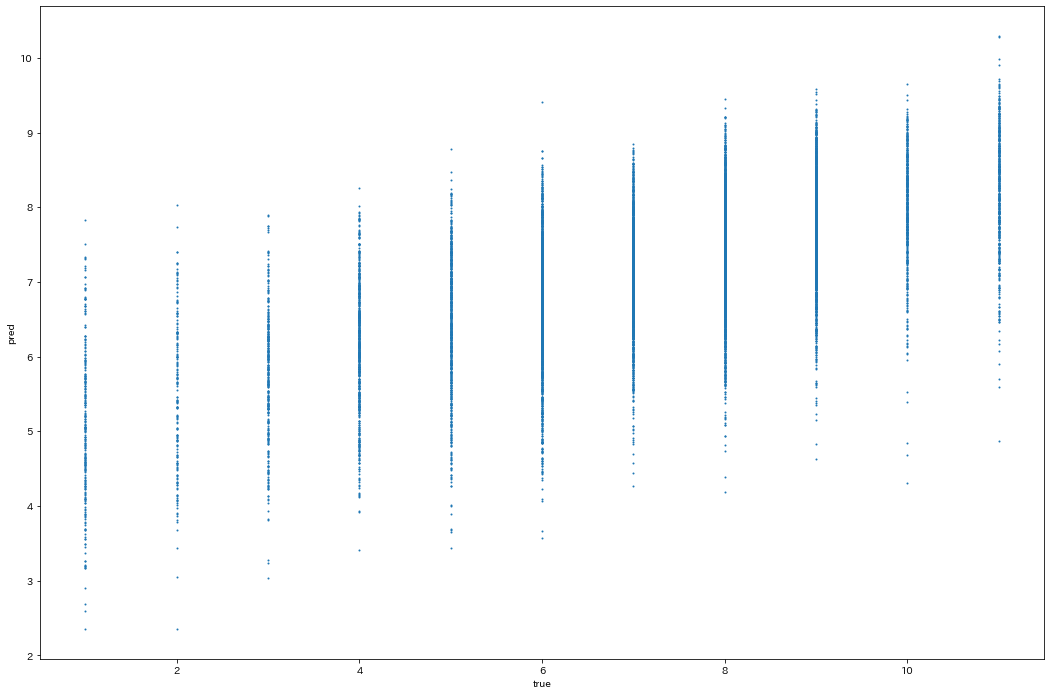

In [45]:
y_train_p = model.predict(X_train)
plt.figure(figsize=(18, 12))
plt.scatter(y_train, y_train_p, s=1) 
plt.xlabel('true')
plt.ylabel('pred') 

In [46]:
# モデル評価
# rmse : 平均二乗誤差の平方根
mse = mean_squared_error(y_val, y_pred) # MSE(平均二乗誤差)の算出
rmse = np.sqrt(mse) # RSME = √MSEの算出
print('RMSE :',rmse)

# r2 : 決定係数
r2 = r2_score(y_val,y_pred)
print('R2 :',r2)

RMSE : 2.035818944133407
R2 : 0.1528825465039818


In [47]:
X_train, X_test, y_train, y_test= train_test_split(exp_2, ans, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val= train_test_split(X_train, y_train, test_size=0.1, random_state=42)
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_val, y_val, reference=lgb_train)

In [48]:
params = {
    'objective': 'regression',
    'metric': 'rmse',
    "boosting_type": "gbdt",
}

best_params, history = {}, []

# LightGBM学習
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=1000,
                valid_sets=[lgb_train, lgb_eval],
                verbose_eval=False,
                early_stopping_rounds=50
               )

best_params = gbm.params
best_params

[I 2021-08-18 21:39:50,140] A new study created in memory with name: no-name-1401eece-35e7-4418-afcb-9a79113acf17
feature_fraction, val_score: inf:   0%|                                                                                                             | 0/7 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000358 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 11223, number of used features: 11
[LightGBM] [Info] Start training from score 7.112893


/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
feature_fraction, val_score: 1.955510:  14%|#############7                                                                                  | 1/7 [00:00<00:02,  2.80it/s]/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
feature_fraction, val_score: 1.955510:  29%|##############

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001701 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 11223, number of used features: 11
[LightGBM] [Info] Start training from score 7.112893
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000406 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 11223, number of used features: 11


/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 7.112893


feature_fraction, val_score: 1.942542:  43%|#########################################1                                                      | 3/7 [00:00<00:01,  3.77it/s]/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
feature_fraction, val_score: 1.941156:  57%|######################################################8                                         | 4/7 [00:00<00:00,  4.53it/s]/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: cate

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001281 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 11223, number of used features: 11
[LightGBM] [Info] Start training from score 7.112893
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000992 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 11223, number of used features: 11
[LightGBM] [Info] Start training from score 7.112893


feature_fraction, val_score: 1.941156:  71%|####################################################################5                           | 5/7 [00:01<00:00,  3.11it/s]/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
feature_fraction, val_score: 1.941156:  86%|##################################################################################2             | 6/7 [00:01<00:00,  3.67it/s]/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000259 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 11223, number of used features: 11
[LightGBM] [Info] Start training from score 7.112893
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000985 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 11223, number of used features: 11


/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
feature_fraction, val_score: 1.941156: 100%|################################################################################################| 7/7 [00:01<00:00,  3.76it/s]


[LightGBM] [Info] Start training from score 7.112893


num_leaves, val_score: 1.941156:   0%|                                                                                                             | 0/20 [00:00<?, ?it/s]/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001426 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 11223, number of used features: 11


/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
num_leaves, val_score: 1.937884:   5%|#####                                                                                                | 1/20 [00:00<00:03,  5.31it/s]

[LightGBM] [Info] Start training from score 7.112893
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001019 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 11223, number of used features: 11


/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 7.112893
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


num_leaves, val_score: 1.937884:  10%|##########1                                                                                          | 2/20 [00:00<00:04,  3.77it/s]/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
num_leaves, val_score: 1.937884:  15%|###############1                                                                                     | 3/20 [00:00<00:03,  4.93it/s]/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: cate

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000991 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 11223, number of used features: 11
[LightGBM] [Info] Start training from score 7.112893
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000891 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 11223, number of used features: 11
[LightGBM] [Info] Start training from score 7.112893
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


num_leaves, val_score: 1.937884:  20%|####################2                                                                                | 4/20 [00:00<00:03,  4.28it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001008 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 11223, number of used features: 11


/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 7.112893
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

num_leaves, val_score: 1.937884:  25%|#########################2                                                                           | 5/20 [00:01<00:04,  3.29it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
num_leaves, val_score: 1.937884:  30%|##############################3                                                                      | 6/20 [00:01<00:03,  3.84it/s]/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 7.112893
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001157 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 11223, number of used features: 11
[LightGBM] [Info] Start training from score 7.112893
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

num_leaves, val_score: 1.937884:  35%|###################################3                                                                 | 7/20 [00:01<00:04,  3.16it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000982 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM]

/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
num_leaves, val_score: 1.937884:  40%|########################################4                                                            | 8/20 [00:02<00:03,  3.48it/s]/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000908 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 11223, number of used features: 11
[LightGBM] [Info] Start training from score 7.112893
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

num_leaves, val_score: 1.937884:  45%|#############################################4                                                       | 9/20 [00:02<00:03,  3.38it/s]/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
num_leaves, val_score: 1.937884:  50%|##################################################                                                  | 10/20 [00:02<00:02,  3.91it/s]/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000945 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 11223, number of used features: 11
[LightGBM] [Info] Start training from score 7.112893
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000950 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 11223, number of used features: 11


/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 7.112893
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

num_leaves, val_score: 1.937884:  55%|#######################################################                                             | 11/20 [00:03<00:02,  3.27it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000926 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 11223, number of used features: 11
[LightGBM] [Info] Start training from score 7.112893


/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
num_leaves, val_score: 1.937884:  60%|############################################################                                        | 12/20 [00:03<00:02,  3.28it/s]/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002714 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 11223, number of used features: 11
[LightGBM] [Info] Start training from score 7.112893


num_leaves, val_score: 1.937884:  65%|#################################################################                                   | 13/20 [00:03<00:02,  3.31it/s]/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000924 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 11223, number of used features: 11
[LightGBM] [Info] Start training from score 7.112893


num_leaves, val_score: 1.937884:  70%|######################################################################                              | 14/20 [00:04<00:02,  2.96it/s]/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001800 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 11223, number of used features: 11
[LightGBM] [Info] Start training from score 7.112893


num_leaves, val_score: 1.937884:  75%|###########################################################################                         | 15/20 [00:04<00:01,  2.99it/s]/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001096 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 11223, number of used features: 11
[LightGBM] [Info] Start training from score 7.112893


num_leaves, val_score: 1.937884:  80%|################################################################################                    | 16/20 [00:04<00:01,  3.22it/s]/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000962 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 11223, number of used features: 11
[LightGBM] [Info] Start training from score 7.112893
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

num_leaves, val_score: 1.937884:  85%|#####################################################################################               | 17/20 [00:05<00:00,  3.01it/s]/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001632 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 11223, number of used features: 11
[LightGBM] [Info] Start training from score 7.112893
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

num_leaves, val_score: 1.937884:  90%|##########################################################################################          | 18/20 [00:05<00:00,  2.62it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001075 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 11223, number of used features: 11
[LightGBM] [Info] Start training from score 7.112893
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
num_leaves, val_score: 1.937884:  95%|###############################################################################################     | 19/20 [00:05<00:00,  2.78it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001065 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 11223, number of used features: 11
[LightGBM] [Info] Start training from score 7.112893


/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
bagging, val_score: 1.937884:   0%|                                                                                                                | 0/10 [00:00<?, ?it/s]/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
bagging, val_score: 1.937884:  10%|##########4            

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001720 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 11223, number of used features: 11
[LightGBM] [Info] Start training from score 7.112893
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001085 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 11223, number of used features: 11
[LightGBM] [Info] Start training from score 7.112893


/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
bagging, val_score: 1.937884:  20%|####################8                                                                                   | 2/10 [00:00<00:01,  5.82it/s]/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
bagging, val_score: 1.937884:  30%|###############################2                                                                        | 3/10 [00:00<00:01,  5.45it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000859 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 11223, number of used features: 11
[LightGBM] [Info] Start training from score 7.112893
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000883 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 11223, number of used features: 11


/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
bagging, val_score: 1.937884:  40%|#########################################6                                                              | 4/10 [00:00<00:01,  5.59it/s]/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 7.112893
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000994 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 11223, number of used features: 11
[LightGBM] [Info] Start training from score 7.112893


bagging, val_score: 1.937884:  50%|####################################################                                                    | 5/10 [00:00<00:00,  5.39it/s]/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001079 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 11223, number of used features: 11
[LightGBM] [Info] Start training from score 7.112893


bagging, val_score: 1.937884:  60%|##############################################################4                                         | 6/10 [00:01<00:00,  4.57it/s]/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
bagging, val_score: 1.937884:  70%|########################################################################8                               | 7/10 [00:01<00:00,  4.92it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000896 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 11223, number of used features: 11
[LightGBM] [Info] Start training from score 7.112893
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001044 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 11223, number of used features: 11


/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
bagging, val_score: 1.937884:  80%|###################################################################################2                    | 8/10 [00:01<00:00,  4.92it/s]

[LightGBM] [Info] Start training from score 7.112893
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000978 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 11223, number of used features: 11
[LightGBM] [Info] Start training from score 7.112893


/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
bagging, val_score: 1.937884:  90%|#############################################################################################6          | 9/10 [00:01<00:00,  5.03it/s]/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000942 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 11223, number of used features: 11
[LightGBM] [Info] Start training from score 7.112893


feature_fraction_stage2, val_score: 1.937884:   0%|                                                                                                 | 0/6 [00:00<?, ?it/s]/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
feature_fraction_stage2, val_score: 1.937884:  17%|##############8                                                                          | 1/6 [00:00<00:00,  5.31it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000867 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 11223, number of used features: 11
[LightGBM] [Info] Start training from score 7.112893
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000941 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 11223, number of used features: 11


/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
feature_fraction_stage2, val_score: 1.937884:  33%|#############################6                                                           | 2/6 [00:00<00:00,  4.62it/s]

[LightGBM] [Info] Start training from score 7.112893


/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
feature_fraction_stage2, val_score: 1.937884:  50%|############################################5                                            | 3/6 [00:00<00:00,  4.86it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000915 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 11223, number of used features: 11
[LightGBM] [Info] Start training from score 7.112893
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001169 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 11223, number of used features: 11


/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
feature_fraction_stage2, val_score: 1.937884:  67%|###########################################################3                             | 4/6 [00:00<00:00,  5.45it/s]/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 7.112893
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001060 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 11223, number of used features: 11
[LightGBM] [Info] Start training from score 7.112893


feature_fraction_stage2, val_score: 1.937884:  83%|##########################################################################1              | 5/6 [00:00<00:00,  5.57it/s]/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
feature_fraction_stage2, val_score: 1.937884: 100%|#########################################################################################| 6/6 [00:01<00:00,  5.45it/s]


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000110 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 11223, number of used features: 11
[LightGBM] [Info] Start training from score 7.112893


regularization_factors, val_score: 1.937884:   0%|                                                                                                 | 0/20 [00:00<?, ?it/s]/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000898 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 11223, number of used features: 11
[LightGBM] [Info] Start training from score 7.112893


/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
regularization_factors, val_score: 1.937884:   5%|####4                                                                                    | 1/20 [00:00<00:03,  4.84it/s]/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
regularization_factors, val_score: 1.937884:  10%|########9                                                                                | 2/20 [00:00<00:03,  4.60it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001198 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 11223, number of used features: 11
[LightGBM] [Info] Start training from score 7.112893


/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
regularization_factors, val_score: 1.937884:  15%|#############3                                                                           | 3/20 [00:00<00:03,  5.44it/s]/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000986 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 11223, number of used features: 11
[LightGBM] [Info] Start training from score 7.112893
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000967 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 11223, number of used features: 11
[LightGBM] [Info] Start training from score 7.112893


regularization_factors, val_score: 1.937884:  20%|#################8                                                                       | 4/20 [00:00<00:02,  5.48it/s]/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
regularization_factors, val_score: 1.937884:  25%|######################2                                                                  | 5/20 [00:00<00:02,  5.31it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000908 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 11223, number of used features: 11
[LightGBM] [Info] Start training from score 7.112893


/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
regularization_factors, val_score: 1.937884:  30%|##########################7                                                              | 6/20 [00:01<00:02,  4.93it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003806 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 11223, number of used features: 11
[LightGBM] [Info] Start training from score 7.112893


[I 2021-08-18 21:40:02,489] Trial 48 finished with value: 1.9395263296544851 and parameters: {'lambda_l1': 0.05206342223905069, 'lambda_l2': 1.438891198502094e-05}. Best is trial 47 with value: 1.9378836415725136.
regularization_factors, val_score: 1.937884:  30%|##########################7                                                              | 6/20 [00:01<00:02,  4.93it/s]/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
regularization_factors, val_score: 1.937884:  35%|###############################1                                                         | 7/20 [00:01<00:02,  5.43it/s]/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:143

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001359 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 11223, number of used features: 11
[LightGBM] [Info] Start training from score 7.112893
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001112 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 11223, number of used features: 11
[LightGBM] [Info] Start training from score 7.112893


regularization_factors, val_score: 1.937884:  40%|###################################6                                                     | 8/20 [00:01<00:02,  5.53it/s]/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
regularization_factors, val_score: 1.937884:  45%|########################################                                                 | 9/20 [00:01<00:02,  5.41it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000920 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 11223, number of used features: 11
[LightGBM] [Info] Start training from score 7.112893
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001233 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 11223, number of used features: 11


/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
regularization_factors, val_score: 1.937884:  50%|############################################                                            | 10/20 [00:01<00:01,  5.59it/s]/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 7.112893
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000981 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 11223, number of used features: 11
[LightGBM] [Info] Start training from score 7.112893


regularization_factors, val_score: 1.937884:  55%|################################################4                                       | 11/20 [00:02<00:01,  5.17it/s]/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
regularization_factors, val_score: 1.937884:  60%|####################################################8                                   | 12/20 [00:02<00:01,  5.18it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000958 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 11223, number of used features: 11
[LightGBM] [Info] Start training from score 7.112893
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000899 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 11223, number of used features: 11


/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
regularization_factors, val_score: 1.937884:  65%|#########################################################2                              | 13/20 [00:02<00:01,  5.09it/s]/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')


[LightGBM] [Info] Start training from score 7.112893
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000073 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 11223, number of used features: 11


/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
regularization_factors, val_score: 1.937884:  70%|#############################################################6                          | 14/20 [00:02<00:01,  4.63it/s]

[LightGBM] [Info] Start training from score 7.112893


/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
regularization_factors, val_score: 1.937884:  75%|##################################################################                      | 15/20 [00:02<00:01,  4.52it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001623 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 11223, number of used features: 11
[LightGBM] [Info] Start training from score 7.112893


/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
regularization_factors, val_score: 1.937884:  80%|######################################################################4                 | 16/20 [00:03<00:00,  4.65it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001026 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 11223, number of used features: 11
[LightGBM] [Info] Start training from score 7.112893


/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
regularization_factors, val_score: 1.937884:  85%|##########################################################################8             | 17/20 [00:03<00:00,  4.71it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001186 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 11223, number of used features: 11
[LightGBM] [Info] Start training from score 7.112893


/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001271 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 11223, number of used features: 11
[LightGBM] [Info] Start training from score 7.112893


regularization_factors, val_score: 1.937884:  90%|###############################################################################2        | 18/20 [00:03<00:00,  4.23it/s]/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
regularization_factors, val_score: 1.937884:  95%|###################################################################################6    | 19/20 [00:03<00:00,  4.37it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000944 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 11223, number of used features: 11
[LightGBM] [Info] Start training from score 7.112893


/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
regularization_factors, val_score: 1.937884: 100%|########################################################################################| 20/20 [00:04<00:00,  4.84it/s]


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001249 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 11223, number of used features: 11
[LightGBM] [Info] Start training from score 7.112893


min_data_in_leaf, val_score: 1.937884:   0%|                                                                                                        | 0/5 [00:00<?, ?it/s]/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
min_data_in_leaf, val_score: 1.936227:  20%|###################2                                                                            | 1/5 [00:00<00:00,  4.61it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001208 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 11223, number of used features: 11
[LightGBM] [Info] Start training from score 7.112893


/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
min_data_in_leaf, val_score: 1.936227:  40%|######################################4                                                         | 2/5 [00:00<00:00,  5.03it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001381 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 11223, number of used features: 11
[LightGBM] [Info] Start training from score 7.112893
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001057 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 11223, number of used features: 11


/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
min_data_in_leaf, val_score: 1.936227:  60%|#########################################################6                                      | 3/5 [00:00<00:00,  5.45it/s]/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 7.112893
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000902 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 11223, number of used features: 11
[LightGBM] [Info] Start training from score 7.112893


min_data_in_leaf, val_score: 1.936227:  80%|############################################################################8                   | 4/5 [00:00<00:00,  5.18it/s]/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
min_data_in_leaf, val_score: 1.936227: 100%|################################################################################################| 5/5 [00:00<00:00,  5.33it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001110 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 11223, number of used features: 11
[LightGBM] [Info] Start training from score 7.112893


{'objective': 'regression',
 'metric': 'rmse',
 'boosting_type': 'gbdt',
 'feature_pre_filter': False,
 'lambda_l1': 0.0,
 'lambda_l2': 0.0,
 'num_leaves': 14,
 'feature_fraction': 0.5,
 'bagging_fraction': 1.0,
 'bagging_freq': 0,
 'min_child_samples': 10,
 'num_iterations': 1000,
 'early_stopping_round': 50,
 'categorical_column': [0, 1, 2, 3, 4, 5, 6, 7]}

In [49]:
# LightGBM推論
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

# 評価
def calculate_scores(true, pred):
    """全ての評価指標を計算する

    Parameters
    ----------
    true (np.array)       : 実測値
    pred (np.array)       : 予測値

    Returns
    -------
    scores (pd.DataFrame) : 各評価指標を纏めた結果

    """
    scores = {}
    scores = pd.DataFrame({'R2': r2_score(true, pred),
                          'RMSE': np.sqrt(mean_squared_error(true, pred))},
                           index = ['scores'])
    return scores

scores = calculate_scores(y_test, y_pred)
print(scores)

              R2      RMSE
scores  0.181342  2.030999


Text(0, 0.5, 'pred')

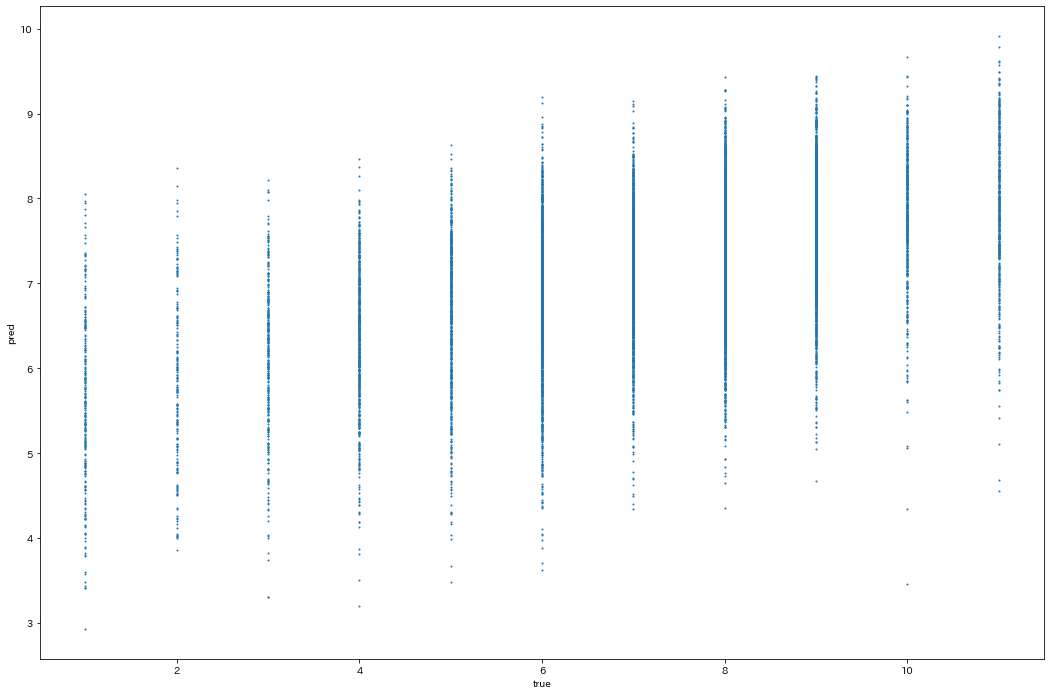

In [50]:
y_pred = gbm.predict(X_train, num_iteration=gbm.best_iteration)
plt.figure(figsize=(18, 12))
plt.scatter(y_train, y_pred, s=1) 
plt.xlabel('true')
plt.ylabel('pred') 

Text(0, 0.5, 'pred')

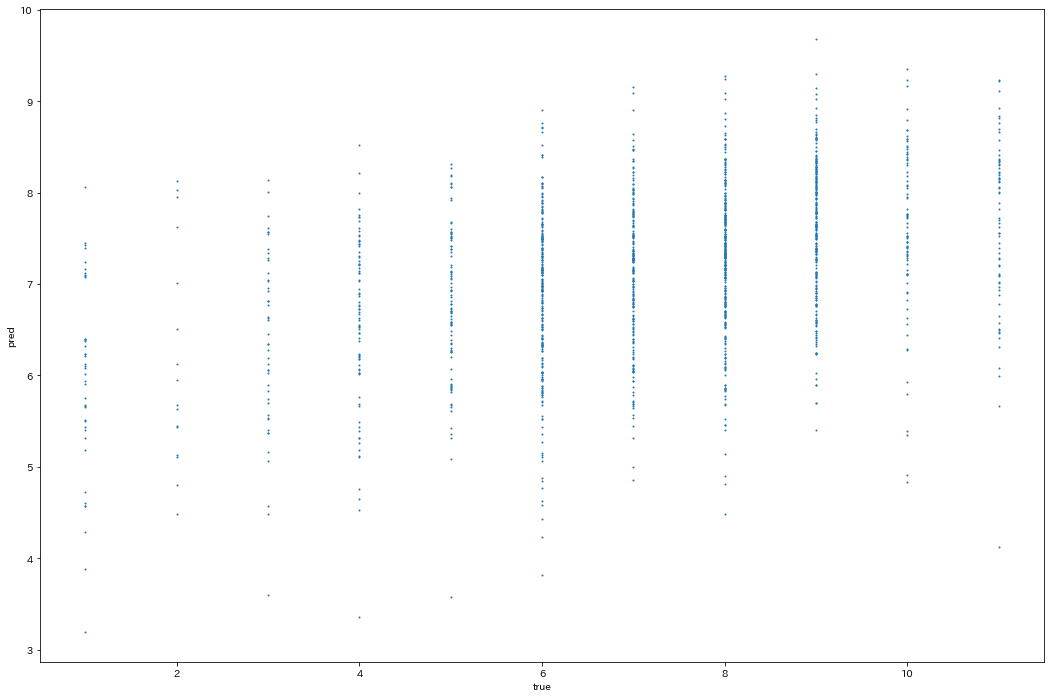

In [51]:
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
plt.figure(figsize=(18, 12))
plt.scatter(y_test, y_pred, s=1) 
plt.xlabel('true')
plt.ylabel('pred') 

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

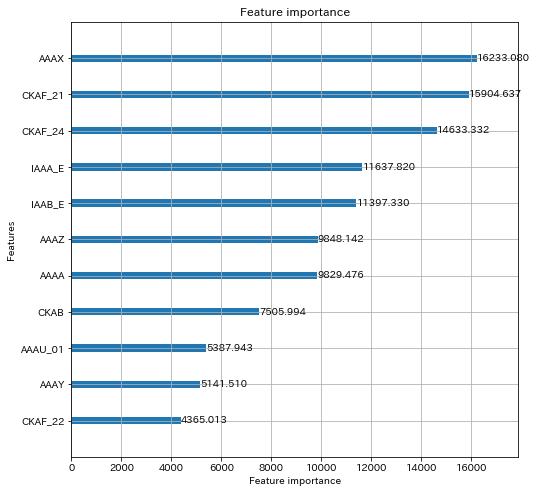

In [62]:
lgb.plot_importance(model, figsize=(8,8), max_num_features=25, importance_type='gain')

In [53]:
gbm.save_model('gbm.txt')

In [63]:
bst = lgb2.Booster(model_file='gbm.txt')

Text(0, 0.5, 'pred')

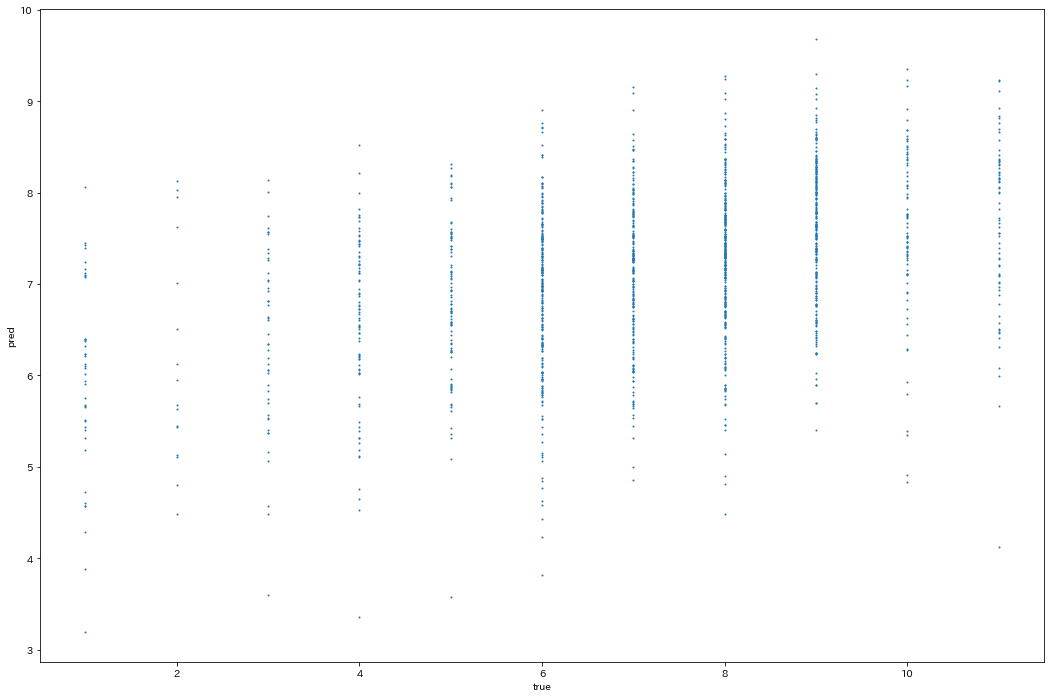

In [55]:
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
plt.figure(figsize=(18, 12))
plt.scatter(y_test, y_pred, s=1) 
plt.xlabel('true')
plt.ylabel('pred') 

In [64]:
columns = ['IAAB_E', 'IAAA_E', 'AAAX', 'AAAA', 'CKAB', 'AAAZ', 'AAAY', 'AAAU_01', 'CKAF_24', 'CKAF_21', 'CKAF_22']
question = ['IAAB_E', 'AAAX', 'AAAA', 'CKAB', 'AAAZ', 'AAAY', 'AAAU_01', 'CKAF_24', 'CKAF_21', 'CKAF_22']
def calc_happiness(answer):
    input_data = pd.DataFrame(columns=columns)
    for key, val in zip(question, answer):
        input_data[key] = [val] * 23
    input_data['IAAA_E'] = list(range(1, 24))
    exp_variable = ['CKAB', 'IAAA_E', 'IAAB_E', 'AAAA', 'AAAX', 'AAAY', 'AAAZ', 'AAAU_01']
    for e in exp_variable:
        input_data[e] = input_data[e].astype('category')
    bst = lgb2.Booster(model_file='gbm.txt')
    y_pred = bst.predict(input_data, num_iteration=bst.best_iteration)
    return list(y_pred)

In [65]:
gbm

In [66]:
answer = [3, 2, 3, 2, 2, 3,'1',1, 2, 1]
calc_happiness(answer)

[6.87307419483534,
 6.2774638618058916,
 6.860013771751913,
 7.527642379212879,
 6.7747574506281305,
 6.906279867841811,
 7.058835968521361,
 7.106084228342442,
 7.20364326227055,
 6.13570343625036,
 7.3817915713794395,
 7.016070703778833,
 6.8022666579383975,
 6.831358953806682,
 6.6180881504440965,
 6.579899555155935,
 6.453325194213183,
 7.242959497899866,
 6.595708161982297,
 6.255494300333282,
 6.674128049828952,
 6.919418510963023,
 6.6458328710815415]

In [67]:
answer = [3, 5, 2, 3, 2, 2, 3,1,1, 2, 1]
calc_happiness(answer)

[7.522611926007149,
 7.2087627901952676,
 7.362057321524625,
 7.936625713856075,
 7.1539583031483716,
 7.641204042590566,
 7.592367837480161,
 7.3673566535948,
 7.482563960079222,
 7.200585194103739,
 7.764170112474514,
 7.455505432101657,
 7.476484466283708,
 7.472243640338253,
 7.424831679204013,
 7.281134772582962,
 7.175634829277084,
 7.742987556274697,
 7.502146193455239,
 7.303578584285132,
 7.205264410038201,
 7.478445656235786,
 7.104163157667107]

In [545]:
bst.feature_importance()

array([265, 285, 256, 185, 272, 161, 165, 125, 205, 222, 211], dtype=int32)

In [560]:
print(exp_2.IAAA_E)

0        24.0
1        11.0
2        39.0
3        39.0
4        24.0
         ... 
13851    39.0
13852    39.0
13853    29.0
13854    39.0
13855    27.0
Name: IAAA_E, Length: 13856, dtype: category
Categories (39, float64): [1.0, 2.0, 3.0, 4.0, ..., 36.0, 37.0, 38.0, 39.0]


/usr/local/lib/python3.9/site-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


In [607]:
X_train.AAAU_01

13461        8
8587         8
10894        8
5906         8
636          8
         ...  
3051         8
5629         8
10498    3,4,6
11243      3,4
13307        8
Name: AAAU_01, Length: 11223, dtype: category
Categories (31, object): ['1,2,3', '1,2,3,4', '1,2,3,4,5', '1,2,3,4,5,6', ..., '6', '6,7', '7', '8']

In [611]:
X_train

,IAAB_E,IAAA_E,AAAX,AAAA,CKAB,AAAZ,AAAY,AAAU_01,CKAF_24,CKAF_21,CKAF_22
13461,40.0,2.0,10.0,12,1.0,3.0,1.0,8,2.0,2.0,3.0
8587,41.0,39.0,5.0,1,11.0,2.0,1.0,8,2.5,2.5,2.5
10894,38.0,35.0,2.0,4,6.0,1.0,1.0,8,4.0,4.0,3.0
5906,28.0,28.0,5.0,3,3.0,3.0,5.0,8,2.0,2.0,2.0
636,6.0,26.0,3.0,1,10.0,2.0,1.0,8,2.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3051,24.0,24.0,6.0,4,5.0,1.0,2.0,8,2.0,3.0,2.0
5629,41.0,39.0,7.0,12,10.0,3.0,15.0,8,1.0,1.0,1.0
10498,7.0,19.0,10.0,2,6.0,3.0,7.0,"3,4,6",2.0,4.0,1.0
11243,41.0,39.0,6.0,12,4.0,2.0,1.0,"3,4",2.0,2.0,2.0
